In [1]:
! pip install langchain-tavily

In [2]:
from langchain_tavily import TavilySearch

tool = TavilySearch()
tools = [tool]   # list of tool lets the agent or graph see all tools and loop through them after picking the right one based on the user's question
tool.invoke("Who is the president of the United States?")

{'query': 'Who is the president of the United States?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://en.wikipedia.org/wiki/President_of_the_United_States',
   'title': 'President of the United States - Wikipedia',
   'content': 'The president of the United States (POTUS) is the head of state and head of government of the United States. The president directs the executive branch of the',
   'score': 0.77650476,
   'raw_content': None},
  {'url': 'https://www.whitehouse.gov/',
   'title': 'The White House',
   'content': 'The White House President Donald J. Trump The White House Image 1 Trump *   White House Wire *   America’s Founding Fathers Image 2: President Trump Liberation Day Image 3: President Trump Medal of Honor Recipients Image 4: President Trump Cabinet Meeting Image 5 Image 6: President Donald J. Trump President of the United States Image 7 Image 8 Image 9 Image 10: President Trump Executive Order Signing Image 11: President Tru

In [3]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages


In [4]:
# Define the state of the graph
# This state will hold the messages exchanged in the graph
class state(TypedDict):
    messages: Annotated[list,add_messages]

graph_builder =  StateGraph(state)    

In [5]:
from dotenv import load_dotenv
import os

load_dotenv()
os.getenv

<function os.getenv(key, default=None)>

In [6]:
#Now bind tool with llm

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-4o")

In [7]:
llm.invoke("What is the capital of France?").content

'The capital of France is Paris.'

In [8]:
llm_with_tools = llm.bind_tools(tools)

In [9]:
from langgraph.prebuilt import ToolNode,tools_condition

In [11]:
def Biva(state):
   return {"messages": [llm_with_tools.invoke(state["messages"])]}  

graph_builder = StateGraph(state)
graph_builder.add_node("Biva",Biva)
graph_builder.add_node("tools",ToolNode(tools))
graph_builder.add_edge(START, "Biva" )
graph_builder.add_conditional_edges("Biva",tools_condition)
graph_builder.add_edge("tools","Biva")
graph_builder.add_edge("Biva",END)
graph = graph_builder.compile()

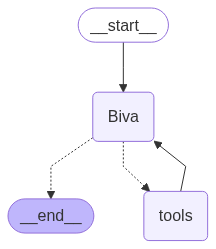

In [12]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass


In [17]:
messages = graph.invoke({"messages": [{"role": "user", "content": "What is latest news on AI"}]})
for m in messages["messages"]:
    m.pretty_print()                 


================================ Human Message =================================

What is latest news on AI
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_6tSVBQSTFrcePLxTZykOrnu6)
 Call ID: call_6tSVBQSTFrcePLxTZykOrnu6
  Args:
    query: latest news on AI
    time_range: day
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "latest news on AI", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.rudebaguette.com/en/2025/07/were-watching-a-brain-drain-in-real-time-openai-hit-hard-as-4-top-researchers-defect-to-rival-tech-giant-meta/", "title": "“We’re Watching a Brain Drain in Real Time”: OpenAI Hit Hard as 4 Top Researchers Defect to Rival Tech Giant Meta - Rude Baguette", "score": 0.65861565, "published_date": "Sat, 05 Jul 2025 16:09:17 GMT", "content": "Image 3: Illustration of four prominent resear